In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [111]:
class Linear:
  def __init__(self, in_dim, out_dim) -> None:
    self.in_dim = in_dim
    self.out_dim = out_dim
    self.W = np.random.uniform(-1,1,(self.out_dim, self.in_dim))
    self.b = np.zeros(self.out_dim)
    self.gradW = 0
    self.gradb = 0

  def forward(self, x_in) -> np.array:
    x_out = x_in @ self.W.T +self.b
    self._in = x_in
    return x_out

  def calc_dLdx(self, gradIn):
    self.gradX = gradIn @ self.W
    return self.gradX

  def calc_dw_db(self, gradIn):
    self.gradW = gradIn.T @ self._in
    # self.gradW = gradIn[np.newaxis].T @ self._in[np.newaxis] # for batch = 1
    self.gradb = gradIn @ np.ones((self.out_dim,self.out_dim))
    # return self.gradW, self.gradb, self.W

  def zerograd(self):
    self.gradW = np.zeros(self.gradW.shape)
    self.gradb = np.zeros(self.gradb.shape)

  def updateWeights(self, lr):
    self.W = self.W - lr * self.gradW
    self.gradb = self.gradb - lr * self.gradb

  def backward(self, gradIn, lr):
    self.calc_dw_db(gradIn)
    self.updateWeights(lr)
    return self.calc_dLdx(gradIn)


In [112]:
# X = np.array([[1,2],
#               [3,4],
#               [5,6]])

# a = Linear(2,3)

# a.forward(X) + np.array([1,2,4])

In [113]:
class Tanh:
  def __init__(self) -> None:
    pass

  def forward(self, x_in):
    self._in = x_in
    return np.tanh(x_in)

  def backward(self, gradIn, lr):
    dth = 1 - np.tanh(self._in)**2
    return np.multiply(gradIn, dth)

In [114]:
class Loss: #RMSE
  def __init__(self) -> None:
    pass

  def forward(self, res, y):
    q2 = (res - y)**2
    q2 = np.sum(q2)
    q2 = q2/len(y)
    q2 = np.sqrt(q2)
    self.loss = q2
    self.len = len(y)
    return self.loss

  def backward(self, res, y):
    dloss = (res-y) /( self.len * self.loss)
    return dloss

In [115]:
class Loss_mean:
  def __init__(self) -> None:
    pass

  def forward(self, res, y):
    # q2 = np.mean((res - y)**2)
    q2 = (res - y)**2
    self.len = len(q2)
    q2 = np.sum(q2)
    q2 = q2/self.len
    self.loss = q2
    return self.loss

  def backward(self, res, y):
    dloss = 2*(res-y) /self.len
    return dloss


# class Loss_mean:
#   def __init__(self) -> None:
#     pass

#   def forward(self, res, y):
#     # q2 = np.mean((res - y)**2)
#     q2 = np.mean((res - y)**2)
#     self.len = len(y)
#     # q2 = np.sum(q2)
#     # q2 = q2/self.len
#     self.loss = q2
#     return self.loss

#   def backward(self, res, y):
#     dloss = 2*(res-y) /self.len
#     return dloss

In [145]:
a1 = Linear(2,3)
t1 = Tanh()
a2 = Linear(3,16)
t2 = Tanh()
a3 = Linear(16,3)
t3 = Tanh()
a4 = Linear(3,2)
t4 = Tanh()
loss = Loss_mean()

In [146]:
model = np.array([a1,t1,a2,t2,a3,t3,a4, t4])

In [147]:
# xin= np.array([[1,2],   #batch = 3
#               [3,4],
#               [5,6]])
# for layer in model:
#     xin = layer.forward(xin)

In [148]:
# Y = np.array([[1,1],
#               [3,1],
#               [5,6]])

# loss.forward(xin, Y) ## Число!!!!

In [162]:
# bl = loss.backward(xin, Y)
# bl  # matrix

In [163]:
X = np.random.uniform(0, np.pi, (1000,2))
batch_size = 4
xin = X.reshape(X.shape[0]//batch_size, batch_size, 2)
X_train = xin[:len(xin)//2]
X_test = xin[len(xin)//2:]

In [164]:
#X.shape, X[:4], xin[0], xin[1], xin.shape, xin[:,:,0].shape

In [165]:
# X[:,0] -- first column
# X[:,1] -- second column
# X
# xin[:,:,0][0]#   xin[:,:,0]  это оно

In [166]:
# xin[:,:,0].flatten()#reshape(-1)

In [167]:
Ysin = np.sin(xin[:,:,0].flatten())
Ycos = np.cos(xin[:,:,1].flatten())
Y = np.vstack((Ysin, Ycos)).T
Y_b = Y.reshape(xin.shape)
# Y_b[0], Y_b.shape, np.sin(xin[0]), np.cos(xin[0])
Y_train = Y_b[:len(Y_b)//2]
Y_test = Y_b[len(Y_b)//2:]

In [168]:
lr = 10e-2
lr

0.1

In [175]:
lr = 10e-2
loses = []
for epoch in range(100):
  for i, xin in enumerate(X_train):
    #forward
    for layer in model:
      xin = layer.forward(xin)
    # compute loss
    loses.append(loss.forward(xin, Y_train[i]))
    #compute loss backward
    gradIn = loss.backward(xin, Y_train[i])
    # compute other backwards
    for layer in np.flip(model):
      gradIn = layer.backward(gradIn, lr)




In [176]:
loses_tst = []
x_pred = []
for i, xin in enumerate(X_test):
  #forward
  for layer in model:
    xin = layer.forward(xin)
  # print(xin)
  x_pred.append(xin)
  # compute loss
  loses_tst.append(loss.forward(xin, Y_test[i]))

In [177]:
import matplotlib.pyplot as plt

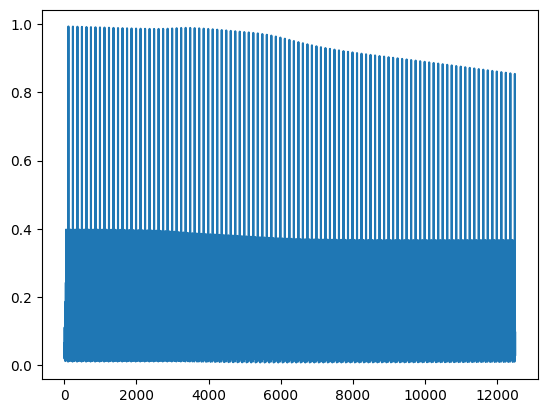

In [178]:
# plt.scatter(X_test[:,0],Y_test[:,0])
plt.plot(loses)

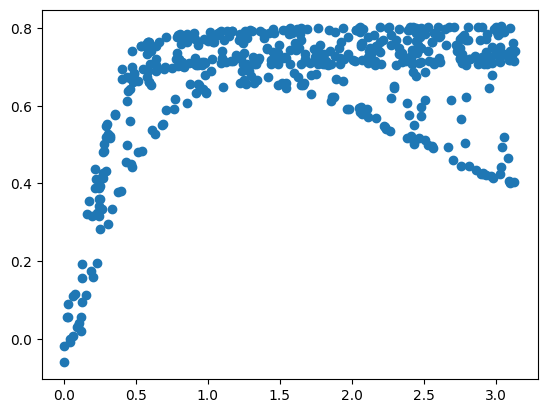

In [179]:
plt.scatter(X_test[:,:,0].flatten(), np.array(x_pred)[:,:,0].flatten())

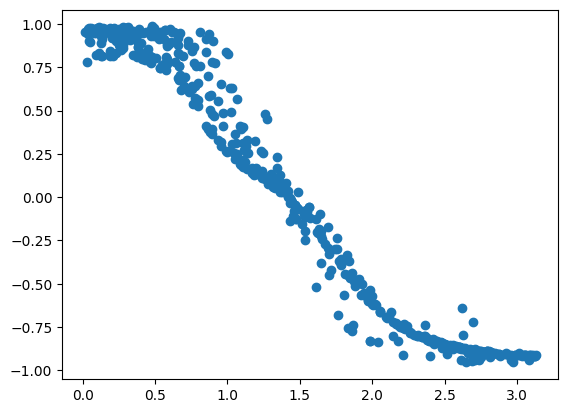

In [180]:
plt.scatter(X_test[:,:,1].flatten(), np.array(x_pred)[:,:,1].flatten())

In [181]:
for x in X_test[:1]:
  print(x)

[[1.63281918 2.14192785]
 [1.41208924 0.75923255]
 [0.00445547 1.75917925]
 [1.85559812 3.05378189]]


In [182]:
np.sin(X_test[0]), np.cos(X_test[0]), Y_test[0]

(array([[0.9980772 , 0.84128983],
        [0.98743244, 0.68836497],
        [0.00445546, 0.98230835],
        [0.95971736, 0.08769796]]),
 array([[-0.06198309, -0.54058434],
        [ 0.15804167,  0.72536451],
        [ 0.99999007, -0.18727067],
        [-0.28096724, -0.99614711]]),
 array([[ 0.9980772 , -0.54058434],
        [ 0.98743244,  0.72536451],
        [ 0.00445546, -0.18727067],
        [ 0.95971736, -0.99614711]]))